/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mergeanje
                                    run  counts   value  valuePacketReceived
0     General-0-20180628-15:12:24-32358     100  1200.0                416.0
1      General-0-20180628-17:08:57-2121     300  3600.0               1015.0
2     General-0-20180629-13:49:23-12034     700  8400.0               2227.0
3     General-0-20180629-13:51:35-12239     600  7200.0               2006.0
4     General-0-20180629-15:45:46-14201     600  7200.0               2926.0
5     General-0-20180629-15:50:18-14429     700  8400.0               4339.0
6     General-1-20180628-15:12:26-32358     100  1200.0                371.0
7      General-1-20180628-17:09:08-2121     300  3600.0               1078.0
8     General-1-20180629-13:50:12-12034     700  8400.0               2286.0
9     General-1-20180629-13:52:15-12239     600  7200.0               1971.0
10    General-1-20180629-15:46:20-14201     600  7200.0               2963.0
11    General-1-20180629-15:51:13-14429     700  8400.0           

[100]
Item is in array already.
[100, 200]
Item is in array already.
[100, 200, 300]
Item is in array already.
[100, 200, 300, 400]
Item is in array already.
[100, 200, 300, 400, 500]
Item is in array already.
[100, 200, 300, 400, 500, 600]
Item is in array already.
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 300, 400, 500, 600, 700]
[100, 200, 30

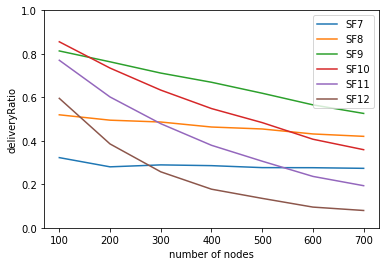

In [3]:
import pandas as pd
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
%matplotlib inline
lora_testchart = pd.read_csv('sim1_BW125_CR1.csv', usecols = ["run","attrname", "name", "value", "type", "attrvalue"])
lora_testchart

sentPacketsDf = lora_testchart[(lora_testchart.name == 'sentPackets')]
sentPacketsByNumberOfNodes = sentPacketsDf.groupby(['run']).size().reset_index(name='counts')

sentPacketsByNodesTotal = sentPacketsDf.groupby(['run']).sum()

packetReceivedDf = lora_testchart[(lora_testchart.name == 'LoRa_GWPacketReceived:count') & (lora_testchart.type == 'scalar')]
#print(packetReceivedDf)
packetReceivedDf.rename(columns={'value': 'valuePacketReceived'}, inplace=True)
packetReceivedByGateway = packetReceivedDf.groupby(['run'], as_index = False )
packetReceivedByGatewayGroupedBy = packetReceivedDf.groupby(['run'])
#print("Dataframe with grouped packetReceived bay Gateway by run: \n")
#print(packetReceivedByGatewayGroupedBy)
BW = lora_testchart[(lora_testchart.name == 'BW')]
#BW = lora_testchart[(lora_testchart.name == 'finalBW')]
BW.rename(columns={'value': 'BW'}, inplace=True)
BW.drop_duplicates(subset=['run', 'BW'], keep='first', inplace=True)
SF = lora_testchart[(lora_testchart.name == 'finalSF')]
SF.rename(columns={'value': 'SF'}, inplace=True)
SF.drop_duplicates(subset=['run', 'SF'], keep='first', inplace=True)
CR = lora_testchart[(lora_testchart.name == 'CR')]
#CR = lora_testchart[(lora_testchart.name == 'finalCF')]
CR.rename(columns={'value': 'CR'}, inplace=True)
CR.drop_duplicates(subset=['run', 'CR'], keep='first', inplace=True)
repetition = lora_testchart[(lora_testchart.attrname == 'repetition')]
repetition.rename(columns={'attrvalue': 'repetition'}, inplace=True)



print("Mergeanje")
df = pd.merge(sentPacketsByNumberOfNodes, sentPacketsByNodesTotal, on="run")
#print(df)
df2 = pd.merge(df, packetReceivedDf[['run','valuePacketReceived']], on="run")
print(df2)
df3 = pd.merge(df2, BW[['run', 'BW']], on="run")
df4 = pd.merge(df3, SF[['run', 'SF']], on="run")
df5 = pd.merge(df4, CR[['run', 'CR']], on="run")
df6 = pd.merge(df5, repetition[['run', 'repetition']], on="run")
print(df6)


xAxis = []
yAxis = []
temp = []

cnt1 = 0
cnt2 = 0
tmpList = []
sumDeliveryRatio = 0.0 
repetition = 0
dfSort = df6.sort_values(['counts', 'SF']).reset_index(drop=True)
#reset_index(drop=True)
print("sortiran dataframe: \n")
print(dfSort)
curNumNodes = dfSort.iloc[0]['counts']
curSF = dfSort.iloc[0]['SF']
print(type(curNumNodes))
print(type(curSF))
#print(oldcounts)
for index, row in dfSort.iterrows():
    if ((row.counts == curNumNodes) & (row.SF == curSF)):# & repetition = True ):
        if(row.valuePacketReceived != 0):
            sumDeliveryRatio = sumDeliveryRatio + (row.valuePacketReceived / row.value)
            repetition = repetition + 1
        else:
            sumDeliveryRatio = sumDeliveryRatio + 0
    else:
        if(sumDeliveryRatio != 0.0):
            tmpList.append([curNumNodes, (sumDeliveryRatio/repetition), int(curSF)])
        else:
            tmpList.append([curNumNodes, 0.0, int(curSF)])
        sumDeliveryRatio = 0
        repetition = 0
        curNumNodes = row.counts
        curSF = row.SF
        if (row.valuePacketReceived != 0):
            sumDeliveryRatio = sumDeliveryRatio + (row.valuePacketReceived / row.value)
            repetition = repetition + 1

if(sumDeliveryRatio != 0.0):
    tmpList.append([curNumNodes, (sumDeliveryRatio/repetition), int(curSF)])
else:
    tmpList.append([curNumNodes, 0.0, int(curSF)])

print(tmpList)
tmpList.sort(key=lambda x: x[2])
print("\nNakon sortiranja\n")
print(tmpList)
SF = 7
yAxisSF7 = []
yAxisSF8 = []
yAxisSF9 = []
yAxisSF10 = []
yAxisSF11 = []
yAxisSF12 = []
numNodes = 0
for item in tmpList:
    if item[0] not in xAxis:
        print("Item is in array already.")
        xAxis.append(item[0])
    print(xAxis)
    SF = item[2]
    if (SF == 7):
         yAxisSF7.append(item[1]);
    elif (SF == 8):
         yAxisSF8.append(item[1]);
    elif (SF == 9):
         yAxisSF9.append(item[1]);
    elif (SF == 10):
         yAxisSF10.append(item[1]);
    elif (SF == 11):
         yAxisSF11.append(item[1]);
    elif (SF == 12):
         yAxisSF12.append(item[1]);
    else:
        printf("Error")

print(xAxis)
print(yAxisSF7)
print(yAxisSF8)
print(yAxisSF9)
print(yAxisSF10)
print(yAxisSF11)
print(yAxisSF12)

plt.plot(xAxis, yAxisSF7, label = 'SF7')
plt.plot(xAxis, yAxisSF8, label = 'SF8')
plt.plot(xAxis, yAxisSF9, label = 'SF9')
plt.plot(xAxis, yAxisSF10, label = 'SF10')
plt.plot(xAxis, yAxisSF11, label = 'SF11')
plt.plot(xAxis, yAxisSF12, label = 'SF12')

plt.legend()
plt.xlabel('number of nodes')
plt.ylabel('deliveryRatio')
plt.ylim(ymax = 1, ymin = 0)
plt.show()
#plt.savefig('4000m.pdf')